(cass_koopmans_2)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Cass-Koopmans Competitive Equilibrium

```{contents} Contents
:depth: 2
```

## Overview

This lecture continues our analysis in this  lecture
{doc}`Cass-Koopmans Planning Model <cass_koopmans_1>` about the  model that Tjalling Koopmans {cite}`Koopmans`
and David Cass {cite}`Cass` used to study optimal capital accumulation.

This lecture illustrates what is, in fact, a
more general connection between a **planned economy** and an economy
organized as a competitive equilibrium or a **market economy**.

The earlier  lecture {doc}`Cass-Koopmans Planning Model <cass_koopmans_1>` studied a planning problem and used ideas including

- A Lagrangian formulation of the  planning problem that leads to a system of difference equations.
- A **shooting algorithm** for solving difference equations subject
  to initial and terminal conditions.
- A **turnpike** property that describes optimal paths for
  long-but-finite horizon economies.

The present lecture uses  additional  ideas including

- Hicks-Arrow prices, named after John R. Hicks and Kenneth Arrow.
- A connection between some Lagrange multipliers from the planning 
  problem and the Hicks-Arrow prices.
- A **Big** $K$ **, little** $k$ trick widely used in
  macroeconomic dynamics.
    * We shall encounter this trick in [this lecture](https://python.quantecon.org/rational_expectations.html)
      and also in [this lecture](https://python-advanced.quantecon.org/dyn_stack.html).
- A non-stochastic version of a theory of the **term structure of
  interest rates**.
- An intimate connection between  two
   ways to organize an economy, namely:
    * **socialism** in which a central planner commands the
      allocation of resources, and
    * **competitive markets** in
      which competitive equilibrium **prices** induce individual
      consumers and producers to choose a socially optimal allocation
      as  unintended consequences of their selfish
      decisions

Let's start with some standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
from numba import njit, float64
from numba.experimental import jitclass
import numpy as np

## Review of Cass-Koopmans Model

The physical setting is identical with that in {doc}`Cass-Koopmans Planning Model <cass_koopmans_1>`.

Time is discrete and takes values $t = 0, 1 , \ldots, T$.

A single good can either be consumed or invested in physical capital.

The consumption good is not durable and depreciates completely if not
consumed immediately.

The capital good is durable but partially depreciates each period at a constant rate.

We let $C_t$ be a nondurable consumption good at time t.

Let $K_t$ be the stock of physical capital at time t.

Let $\vec{C}$ = $\{C_0,\dots, C_T\}$ and
$\vec{K}$ = $\{K_0,\dots,K_{T+1}\}$.

A representative household is endowed with one unit of labor at each
$t$ and likes the consumption good at each $t$.

The representative household inelastically supplies a single unit of
labor $N_t$ at each $t$, so that
$N_t =1 \text{ for all } t \in [0,T]$.

The representative household has preferences over consumption bundles
ordered by the utility functional:

$$
U(\vec{C}) = \sum_{t=0}^{T} \beta^t \frac{C_t^{1-\gamma}}{1-\gamma}
$$

where $\beta \in (0,1)$ is a discount factor and $\gamma >0$
governs the curvature of the one-period utility function.

We assume that $K_0 > 0$.

There is an economy-wide production function

$$
F(K_t,N_t) = A K_t^{\alpha}N_t^{1-\alpha}
$$

with $0 < \alpha<1$, $A > 0$.

A feasible allocation $\vec{C}, \vec{K}$ satisfies

$$
C_t + K_{t+1} \leq F(K_t,N_t) + (1-\delta) K_t, \quad \text{for all } t \in [0, T]
$$

where $\delta \in (0,1)$ is a depreciation rate of capital.

### Planning Problem

In this lecture {doc}`Cass-Koopmans Planning Model <cass_koopmans_1>`, we studied a problem in which a planner chooses an allocation $\{\vec{C},\vec{K}\}$ to
maximize {eq}`utility-functional` subject to {eq}`allocation`.

The allocation that solves the planning problem reappears in a competitive equilibrium, as we shall see below.

## Competitive Equilibrium

We now study a decentralized version of the  economy.

It shares  the same
technology and preference structure as the planned economy studied in this lecture {doc}`Cass-Koopmans Planning Model <cass_koopmans_1>`.

But now there is no planner.

There are (unit masses of) price taking consumers and firms.

Market prices are set to reconcile distinct decisions that are made
separately by a representative household and a representative firm.

There is a representative consumer who has the same preferences over
consumption plans as did a consumer in the planned economy.

Instead of being told what to consume and save by a planner, a
consumer (also known as a *household*) chooses for itself subject to a budget constraint

- At each time $t$, the household receives wages and rentals
  of capital from a firm -- these comprise its **income** at
  time $t$.
- The consumer decides how much income to allocate to consumption or
  to savings.
- The household can save either by acquiring additional physical
  capital (it trades one for one with time $t$ consumption)
  or by acquiring claims on consumption at dates other
  than $t$.
- The household owns all physical capital and labor
  and rents them to the firm.
- The household consumes, supplies labor, and invests in physical
  capital.
- A profit-maximizing representative firm operates the production
  technology.
- The firm rents labor and capital each period from the
  representative household and sells its output each period to the
  household.
- The representative household and the representative firm are both
  **price takers** who believe that prices are not affected by their choices

```{note}
We can think of there being  unit measures of identical representative consumers and 
identical representative firms.
```

## Market Structure

The representative household and the representative firm are both price takers.

The household owns both factors of production, namely, labor and physical capital.

Each period, the firm rents both factors from the household.

There is a **single** grand competitive market in which a
household can trade date $0$ goods for goods at
all other dates $t=1, 2, \ldots, T$.

### Prices

There are  sequences of prices
$\{w_t,\eta_t\}_{t=0}^T= \{\vec{w}, \vec{\eta} \}$
where 

- $w_t$ is a wage or rental rate for labor at time $t$

- $\eta_t$ is a rental rate for capital at time $t$

In addition there is a vector $\{q_t^0\}$ of  intertemporal prices where  

- $q^0_t$ is the price of a good at date $t$ relative
to a good at date $0$.

We call $\{q^0_t\}_{t=0}^T$  a vector of **Hicks-Arrow prices**,
named after the 1972 economics Nobel prize winners.

Units of $q_t^0$ could be 

$$
\frac{\text{number of time 0 goods}}{\text{number of time t goods}}
$$

But because $q^0_t$ is a **relative price**, the units in terms of
which prices are quoted are arbitrary, we are free to re-normalize them.

## Firm Problem

At time $t$ a representative firm hires labor
$\tilde n_t$ and capital $\tilde k_t$.

The firm's profits at time $t$ are

$$
F(\tilde k_t, \tilde n_t)-w_t \tilde n_t -\eta_t \tilde k_t
$$

where $w_t$ is a wage rate at $t$
and $\eta_t$ is the rental rate on capital at $t$.

As in the planned economy model

$$
F(\tilde k_t, \tilde n_t) = A \tilde k_t^\alpha \tilde n_t^{1-\alpha}
$$

### Zero Profit Conditions

Zero-profits condition for capital and labor are

$$
F_k(\tilde k_t, \tilde n_t) =\eta_t
$$

and

```{math}
:label: Zero-profits

F_n(\tilde k_t, \tilde n_t) =w_t
```

These conditions emerge from a no-arbitrage requirement.

To describe this no-arbitrage profits  reasoning, we begin by applying a theorem of
Euler about linearly homogenous functions.

The theorem applies to the Cobb-Douglas production function because
it assumed displays constant returns to scale:

$$
\alpha F(\tilde k_t, \tilde n_t) =  F(\alpha  \tilde k_t, \alpha \tilde n_t)
$$

for $\alpha \in (0,1)$.

Taking the partial derivative
$\frac{\partial F }{\partial \alpha}$ on both sides of the
above equation gives

$$
F(\tilde k_t,\tilde n_t) =_\text{chain rule} \frac{\partial F}{\partial \tilde k_t}
\tilde k_t + \frac{\partial F}{\partial \tilde  n_t} \tilde n_t
$$

Rewrite the firm's profits as

$$
\frac{\partial F}{\partial \tilde k_t} \tilde k_t +
\frac{\partial F}{\partial \tilde  n_t} \tilde n_t-w_t \tilde n_t -\eta_t k_t
$$

or

$$
\left(\frac{\partial F}{\partial \tilde k_t}-\eta_t\right) \tilde k_t +
\left(\frac{\partial F}{\partial \tilde  n_t}-w_t\right) \tilde n_t
$$

Because $F$ is homogeneous of degree $1$, it follows
that $\frac{\partial F}{\partial \tilde k_t}$ and
$\frac{\partial F}{\partial \tilde n_t}$ are homogeneous of
degree $0$ and therefore fixed with respect to
$\tilde k_t$ and $\tilde n_t$.

If $\frac{\partial F}{\partial \tilde k_t}> \eta_t$, then the
firm makes positive profits on each additional unit of
$\tilde k_t$, so it would want to make $\tilde k_t$
arbitrarily large.

But setting $\tilde k_t = + \infty$ is not physically feasible,
so presumably **equilibrium** prices will assume values that present
the firm with no such arbitrage opportunity.

A similar argument applies if
$\frac{\partial F}{\partial \tilde n_t}> w_t$.

If $\frac{\partial \tilde k_t}{\partial \tilde k_t}< \eta_t$,
the firm would want to set  $\tilde k_t$ to zero, which is not feasible.

It is convenient to define
$\vec{w} =\{w_0, \dots,w_T\}$and $\vec{\eta}= \{\eta_0, \dots, \eta_T\}$.

## Household Problem

A representative household lives at $t=0,1,\dots, T$.

At $t$, the household rents $1$ unit of labor
and $k_t$ units of capital to a firm and receives income

$$
w_t 1+ \eta_t k_t
$$

At $t$ the household allocates its income to the following
purchases

$$
\left(c_t + (k_{t+1} -(1-\delta)k_t)\right)
$$

Here $\left(k_{t+1} -(1-\delta)k_t\right)$ is the household's
net investment in physical capital and $\delta \in (0,1)$ is
again a depreciation rate of capital.

In period $t$ is free to purchase more goods to be consumed and
invested in physical capital than its income from supplying capital
and labor to the firm, provided that in some other periods its income
exceeds its purchases.

A household's net excess demand for time $t$ consumption goods
is the gap

$$
e_t \equiv \left(c_t + (k_{t+1} -(1-\delta)k_t)\right)-(w_t 1 + \eta_t k_t)
$$

Let $\vec{c} = \{c_0,\dots,c_T\}$ and let $\vec{k} = \{k_1,\dots,k_{T+1}\}$.

$k_0$ is given to the household.

The household faces a **single** budget constraint.
that states that the present value of the household's net excess
demands must be zero:

$$
\sum_{t=0}^T q^0_t e_t  \leq 0
$$

or

$$
\sum_{t=0}^T q^0_t  \left(c_t + (k_{t+1} -(1-\delta)k_t)-(w_t 1 + \eta_t k_t) \right) \leq 0
$$

The household chooses an allocation to solve the constrained optimization problem:

$$
\begin{aligned}& \max_{\vec{c}, \vec{k} }  \sum_{t=0}^T \beta^t u(c_t) \\ \text{subject to} \ \   & \sum_{t=0}^T q_t^0\left(c_t +\left(k_{t+1}-(1-\delta) k_t\right) -w_t -\eta_t k_t\right) \leq 0  \notag \end{aligned}
$$

### Definitions

- A **price system** is a sequence
  $\{q_t^0,\eta_t,w_t\}_{t=0}^T= \{\vec{q}, \vec{\eta}, \vec{w}\}$.
- An **allocation** is a sequence
  $\{c_t,k_{t+1},n_t=1\}_{t=0}^T = \{\vec{c}, \vec{k}, \vec{n}\}$.
- A **competitive equilibrium** is a price system and an allocation
  for which
    - Given the price system, the allocation solves the household's
      problem.
    - Given the price system, the allocation solves the firm's
      problem.

## Computing a Competitive Equilibrium

We compute a competitive equilibrium by using a **guess and
verify** approach.

- We  **guess** equilibrium price sequences
  $\{\vec{q}, \vec{\eta}, \vec{w}\}$.
- We then **verify** that at those prices, the household and
  the firm choose the same allocation.

### Guess for Price System

In this lecture {doc}`Cass-Koopmans Planning Model <cass_koopmans_1>`, we  computed an allocation $\{\vec{C}, \vec{K}, \vec{N}\}$
that solves the planning problem.

(This allocation will constitute the **Big** $K$  to be in the present instance of the **Big** $K$ **, little** $k$ trick
that we'll apply to  a competitive equilibrium in the spirit of [this lecture](https://python.quantecon.org/rational_expectations.html)
and  [this lecture](https://python-advanced.quantecon.org/dyn_stack.html).)

We use that allocation to construct a guess for the equilibrium
price system.

In particular, we guess that for $t=0,\dots,T$:

```{math}
:label: eq-price

\lambda q_t^0 = \beta^t u'(K_t) =\beta^t \mu_t
```

```{math}
:label: eq-price2

w_t = f(K_t) -K_t f'(K_t)
```

```{math}
:label: eq-price3

\eta_t = f'(K_t)
```

At these prices, let the capital chosen by the household be

```{math}
:label: eq-pr4

k^*_t(\vec {q}, \vec{w}, \vec{\eta)} , \quad t \geq 0
```

and let the allocation chosen by the firm be

$$
\tilde k^*_t(\vec{q}, \vec{w}, \vec{\eta}), \quad t \geq 0
$$

and so on.

If our guess for the equilibrium price system is correct, then it
must occur that

```{math}
:label: ge1

k_t^*  = \tilde k_t^*
```

```{math}
:label: ge2

1   = \tilde n_t^*
```

$$
c_t^* + k_{t+1}^* - (1-\delta) k_t^*  = F(\tilde k_t^*, \tilde n_t^*)
$$

We shall verify that for $t=0,\dots,T$ the allocations chosen
by the household and the firm both equal the allocation that solves
the planning problem:

```{math}
:label: eq-pl

k^*_t = \tilde k^*_t=K_t, \tilde n_t=1, c^*_t=C_t
```

### Verification Procedure

Our approach is to stare at first-order necessary conditions for the
optimization problems of the household and the firm.

At the price system we have guessed, we'll then verify that both sets of first-order
conditions are satisfied at the allocation that solves the planning
problem.

### Household's Lagrangian

To solve the household's problem, we formulate the Lagrangian

$$
\mathcal{L}(\vec{c},\vec{k},\lambda) = \sum_{t=0}^T \beta^t u(c_t)+ \lambda \left(\sum_{t=0}^T q_t^0\left(\left((1-\delta) k_t -w_t\right)
+\eta_t k_t -c_t  - k_{t+1}\right)\right)
$$

and attack the min-max problem:

$$
\min_{\lambda} \max_{\vec{c},\vec{k}}  \mathcal{L}(\vec{c},\vec{k},\lambda)
$$

First-order conditions are

```{math}
:label: cond1

c_t: \quad \beta^t u'(c_t)-\lambda q_t^0=0 \quad  t=0,1,\dots,T
```

```{math}
:label: cond2

k_t: \quad -\lambda q_t^0 \left[(1-\delta)+\eta_t \right]+\lambda q^0_{t-1}=0 \quad  t=1,2,\dots,T+1
```

```{math}
:label: cond3

\lambda:  \quad \left(\sum_{t=0}^T q_t^0\left(c_t + \left(k_{t+1}-(1-\delta) k_t\right) -w_t -\eta_t k_t\right)\right) \leq 0
```

```{math}
:label: cond4

k_{T+1}: \quad -\lambda q_0^{T+1} \leq 0, \ \leq 0 \text{ if } k_{T+1}=0; \ =0 \text{ if } k_{T+1}>0
```

Now we plug in our guesses of prices and embark on some algebra in the hope of recovering all first-order necessary conditions
{eq}`constraint1`-{eq}`constraint4` for the planning problem from this lecture {doc}`Cass-Koopmans Planning Model <cass_koopmans_1>`.

Combining {eq}`cond1` and {eq}`eq-price`, we get:

$$
u'(C_t) = \mu_t
$$

which is {eq}`constraint1`.

Combining {eq}`cond2`, {eq}`eq-price`, and
{eq}`eq-price3` we get:

```{math}
:label: co-re

-\lambda \beta^t \mu_t\left[(1-\delta) +f'(K_t)\right] +\lambda \beta^{t-1}\mu_{t-1}=0
```

Rewriting {eq}`co-re` by dividing by $\lambda$ on
both sides (which is nonzero since  u'>0) we get:

$$
\beta^t \mu_t [(1-\delta+f'(K_t)] = \beta^{t-1} \mu_{t-1}
$$

or

$$
\beta \mu_t [(1-\delta+f'(K_t)] = \mu_{t-1}
$$

which is {eq}`constraint2`.

Combining {eq}`cond3`, {eq}`eq-price`, {eq}`eq-price2`
and {eq}`eq-price3` after multiplying both sides of
{eq}`cond3` by $\lambda$, we get

$$
\sum_{t=0}^T \beta^t \mu_{t} \left(C_t+ (K_{t+1} -(1-\delta)K_t)-f(K_t)+K_t f'(K_t)-f'(K_t)K_t\right) \leq 0
$$

which simplifies to

$$
\sum_{t=0}^T  \beta^t \mu_{t} \left(C_t +K_{t+1} -(1-\delta)K_t - F(K_t,1)\right) \leq 0
$$

Since $\beta^t \mu_t >0$ for $t =0, \ldots, T$, it follows that

$$
C_t+K_{t+1}-(1-\delta)K_t -F(K_t,1)=0 \quad  \text{ for all }t \text{ in } 0,\dots,T
$$

which is {eq}`constraint3`.

Combining {eq}`cond4` and {eq}`eq-price`, we get:

$$
-\beta^{T+1} \mu_{T+1} \leq 0
$$

Dividing both sides by $\beta^{T+1}$ gives

$$
-\mu_{T+1} \leq 0
$$

which is  {eq}`constraint4` for the  planning problem.

Thus, at our guess of the equilibrium price system, the allocation
that solves the planning problem also solves the problem faced by a
representative household living in a competitive equilibrium.

We now turn to  the problem faced by a firm in a competitive
equilibrium:

If we plug {eq}`eq-pl` into {eq}`Zero-profits` for all t, we
get

$$
\frac{\partial F(K_t, 1)}{\partial K_t} = f'(K_t) = \eta_t
$$

which is {eq}`eq-price3`.

If we now plug {eq}`eq-pl` into {eq}`Zero-profits` for all t, we
get:

$$
\frac{\partial F(\tilde K_t, 1)}{\partial \tilde L_t} = f(K_t)-f'(K_t)K_t=w_t
$$

which is exactly {eq}`eq-pr4`.

Thus, at our guess for the equilibrium price system, the allocation
that solves the planning problem also solves the problem faced by a firm
within a competitive equilibrium.

By {eq}`ge1` and {eq}`ge2` this allocation is
identical to the one that solves the consumer's problem.

```{note}
Because budget sets are affected only by relative prices,
$\{q_0^t\}$ is determined only up to multiplication by a
positive constant.
```

**Normalization:** We are free to choose a $\{q_0^t\}$ that
makes $\lambda=1$ so that we are measuring $q_0^t$  in
units of the marginal utility of time $0$ goods.

We will  plot $q, w, \eta$ below to show these equilibrium  prices
induce the same aggregate movements that we saw earlier in the planning
problem.

To proceed, we bring in Python code that {doc}`Cass-Koopmans Planning Model <cass_koopmans_1>` used to solve the planning problem

First let's define a `jitclass` that stores  parameters and functions
the characterize an economy.

In [2]:
planning_data = [
    ('γ', float64),    # Coefficient of relative risk aversion
    ('β', float64),    # Discount factor
    ('δ', float64),    # Depreciation rate on capital
    ('α', float64),    # Return to capital per capita
    ('A', float64)     # Technology
]

In [3]:
@jitclass(planning_data)
class PlanningProblem():

    def __init__(self, γ=2, β=0.95, δ=0.02, α=0.33, A=1):

        self.γ, self.β = γ, β
        self.δ, self.α, self.A = δ, α, A

    def u(self, c):
        '''
        Utility function
        ASIDE: If you have a utility function that is hard to solve by hand
        you can use automatic or symbolic differentiation
        See https://github.com/HIPS/autograd
        '''
        γ = self.γ

        return c ** (1 - γ) / (1 - γ) if γ!= 1 else np.log(c)

    def u_prime(self, c):
        'Derivative of utility'
        γ = self.γ

        return c ** (-γ)

    def u_prime_inv(self, c):
        'Inverse of derivative of utility'
        γ = self.γ

        return c ** (-1 / γ)

    def f(self, k):
        'Production function'
        α, A = self.α, self.A

        return A * k ** α

    def f_prime(self, k):
        'Derivative of production function'
        α, A = self.α, self.A

        return α * A * k ** (α - 1)

    def f_prime_inv(self, k):
        'Inverse of derivative of production function'
        α, A = self.α, self.A

        return (k / (A * α)) ** (1 / (α - 1))

    def next_k_c(self, k, c):
        ''''
        Given the current capital Kt and an arbitrary feasible
        consumption choice Ct, computes Kt+1 by state transition law
        and optimal Ct+1 by Euler equation.
        '''
        β, δ = self.β, self.δ
        u_prime, u_prime_inv = self.u_prime, self.u_prime_inv
        f, f_prime = self.f, self.f_prime

        k_next = f(k) + (1 - δ) * k - c
        c_next = u_prime_inv(u_prime(c) / (β * (f_prime(k_next) + (1 - δ))))

        return k_next, c_next

In [4]:
@njit
def shooting(pp, c0, k0, T=10):
    '''
    Given the initial condition of capital k0 and an initial guess
    of consumption c0, computes the whole paths of c and k
    using the state transition law and Euler equation for T periods.
    '''
    if c0 > pp.f(k0):
        print("initial consumption is not feasible")

        return None

    # initialize vectors of c and k
    c_vec = np.empty(T+1)
    k_vec = np.empty(T+2)

    c_vec[0] = c0
    k_vec[0] = k0

    for t in range(T):
        k_vec[t+1], c_vec[t+1] = pp.next_k_c(k_vec[t], c_vec[t])

    k_vec[T+1] = pp.f(k_vec[T]) + (1 - pp.δ) * k_vec[T] - c_vec[T]

    return c_vec, k_vec

In [5]:
@njit
def bisection(pp, c0, k0, T=10, tol=1e-4, max_iter=500, k_ter=0, verbose=True):

    # initial boundaries for guess c0
    c0_upper = pp.f(k0)
    c0_lower = 0

    i = 0
    while True:
        c_vec, k_vec = shooting(pp, c0, k0, T)
        error = k_vec[-1] - k_ter

        # check if the terminal condition is satisfied
        if np.abs(error) < tol:
            if verbose:
                print('Converged successfully on iteration ', i+1)
            return c_vec, k_vec

        i += 1
        if i == max_iter:
            if verbose:
                print('Convergence failed.')
            return c_vec, k_vec

        # if iteration continues, updates boundaries and guess of c0
        if error > 0:
            c0_lower = c0
        else:
            c0_upper = c0

        c0 = (c0_lower + c0_upper) / 2

In [6]:
pp = PlanningProblem()

# Steady states
ρ = 1 / pp.β - 1
k_ss = pp.f_prime_inv(ρ+pp.δ)
c_ss = pp.f(k_ss) - pp.δ * k_ss

The above code from this lecture {doc}`Cass-Koopmans Planning Model <cass_koopmans_1>` lets us compute an optimal allocation for the planning problem that turns
out to be the allocation associated with a competitive equilibium.

Now  we're ready to bring in Python code that we require to compute additional objects that appear in a competitive equilibrium.

In [7]:
@njit
def q(pp, c_path):
    # Here we choose numeraire to be u'(c_0) -- this is q^(t_0)_t
    T = len(c_path) - 1
    q_path = np.ones(T+1)
    q_path[0] = 1
    for t in range(1, T+1):
        q_path[t] = pp.β ** t * pp.u_prime(c_path[t])
    return q_path

@njit
def w(pp, k_path):
    w_path = pp.f(k_path) - k_path * pp.f_prime(k_path)
    return w_path

@njit
def η(pp, k_path):
    η_path = pp.f_prime(k_path)
    return η_path

Now we calculate and plot for each $T$

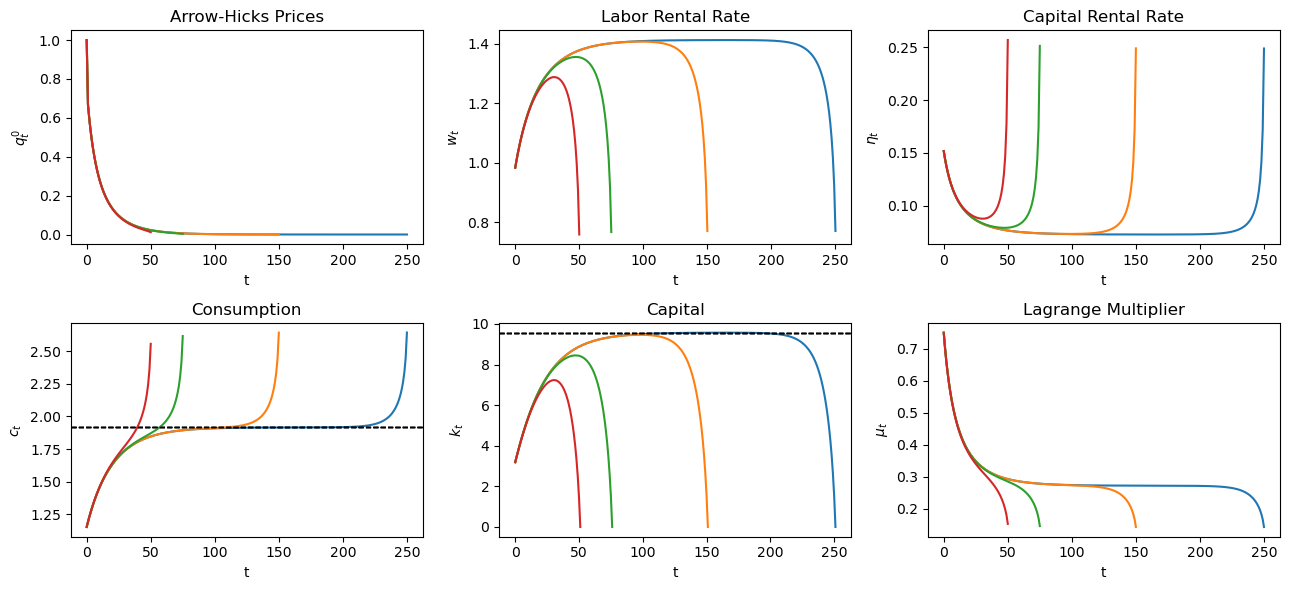

In [8]:
T_arr = [250, 150, 75, 50]

fix, axs = plt.subplots(2, 3, figsize=(13, 6))
titles = ['Arrow-Hicks Prices', 'Labor Rental Rate', 'Capital Rental Rate',
          'Consumption', 'Capital', 'Lagrange Multiplier']
ylabels = ['$q_t^0$', '$w_t$', '$\eta_t$', '$c_t$', '$k_t$', '$\mu_t$']

for T in T_arr:
    c_path, k_path = bisection(pp, 0.3, k_ss/3, T, verbose=False)
    μ_path = pp.u_prime(c_path)

    q_path = q(pp, c_path)
    w_path = w(pp, k_path)[:-1]
    η_path = η(pp, k_path)[:-1]
    paths = [q_path, w_path, η_path, c_path, k_path, μ_path]

    for i, ax in enumerate(axs.flatten()):
        ax.plot(paths[i])
        ax.set(title=titles[i], ylabel=ylabels[i], xlabel='t')
        if titles[i] == 'Capital':
            ax.axhline(k_ss, lw=1, ls='--', c='k')
        if titles[i] == 'Consumption':
            ax.axhline(c_ss, lw=1, ls='--', c='k')

plt.tight_layout()
plt.show()

#### Varying Curvature

Now we see how our results change if we keep $T$ constant, but allow
the curvature parameter, $\gamma$ to vary, starting
with $K_0$ below the steady state.

We plot the results for $T=150$

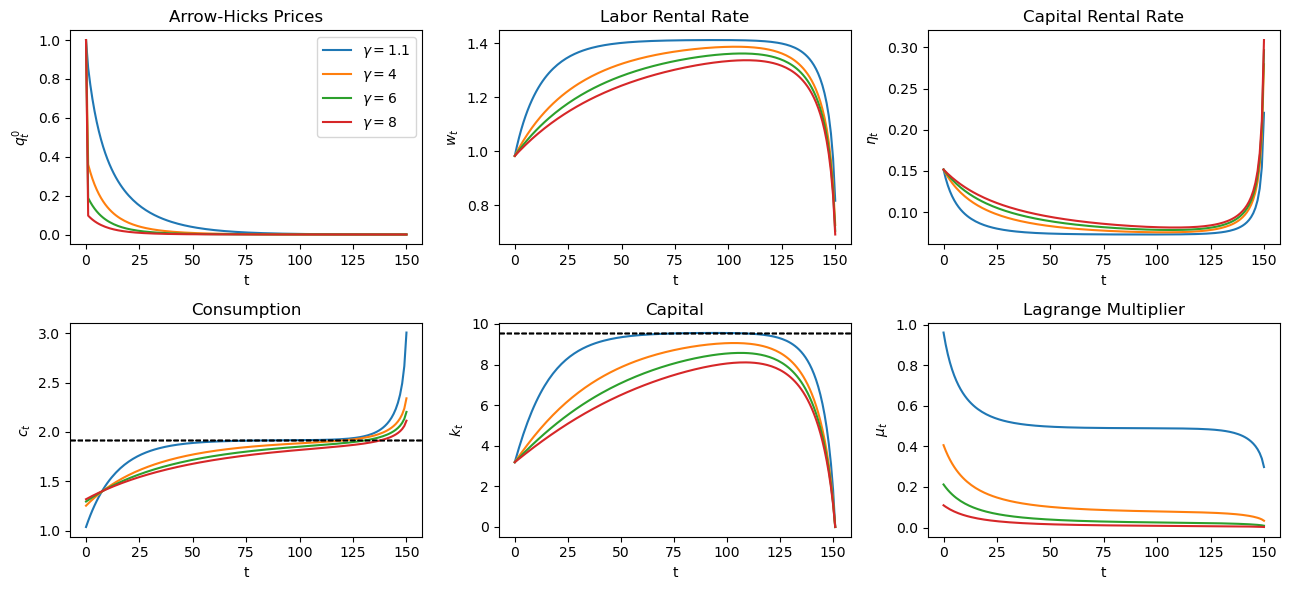

In [9]:
T = 150
γ_arr = [1.1, 4, 6, 8]

fix, axs = plt.subplots(2, 3, figsize=(13, 6))

for γ in γ_arr:
    pp_γ = PlanningProblem(γ=γ)
    c_path, k_path = bisection(pp_γ, 0.3, k_ss/3, T, verbose=False)
    μ_path = pp_γ.u_prime(c_path)

    q_path = q(pp_γ, c_path)
    w_path = w(pp_γ, k_path)[:-1]
    η_path = η(pp_γ, k_path)[:-1]
    paths = [q_path, w_path, η_path, c_path, k_path, μ_path]

    for i, ax in enumerate(axs.flatten()):
        ax.plot(paths[i], label=f'$\gamma = {γ}$')
        ax.set(title=titles[i], ylabel=ylabels[i], xlabel='t')
        if titles[i] == 'Capital':
            ax.axhline(k_ss, lw=1, ls='--', c='k')
        if titles[i] == 'Consumption':
            ax.axhline(c_ss, lw=1, ls='--', c='k')

axs[0, 0].legend()
plt.tight_layout()
plt.show()

Adjusting $\gamma$ means adjusting how much individuals prefer
to smooth consumption.

Higher $\gamma$ means individuals prefer to smooth more
resulting in slower adjustments to the steady state allocations.

Vice-versa for lower $\gamma$.

## Yield Curves and Hicks-Arrow Prices

We return to  Hicks-Arrow prices and  calculate how they are related to  **yields**  on loans of alternative maturities.

This will let us plot a **yield curve** that graphs   yields  on bonds of  maturities $j=1, 2, \ldots$ against $j=1,2, \ldots$.

The formulas we want are:

A **yield to maturity** on a loan made at time $t_0$ that matures at time $t > t_0$

$$
r_{t_0,t}= -\frac{\log q^{t_0}_t}{t - t_0}
$$

A Hicks-Arrow price for a base-year $t_0\leq t$

$$
q^{t_0}_t = \beta^{t-t_0} \frac{u'(c_t)}{u'(c_{t_0})}= \beta^{t-t_0}
\frac{c_t^{-\gamma}}{c_{t_0}^{-\gamma}}
$$

We redefine our function for $q$ to allow arbitrary base
years, and define a new function for $r$, then plot both.

We begin by continuing to assume that  $t_0=0$ and plot things for different maturities $t=T$, with $K_0$ below the steady state

In [10]:
@njit
def q_generic(pp, t0, c_path):
    # simplify notations
    β = pp.β
    u_prime = pp.u_prime

    T = len(c_path) - 1
    q_path = np.zeros(T+1-t0)
    q_path[0] = 1
    for t in range(t0+1, T+1):
        q_path[t-t0] = β ** (t-t0) * u_prime(c_path[t]) / u_prime(c_path[t0])
    return q_path

@njit
def r(pp, t0, q_path):
    '''Yield to maturity'''
    r_path = - np.log(q_path[1:]) / np.arange(1, len(q_path))
    return r_path

def plot_yield_curves(pp, t0, c0, k0, T_arr):

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    for T in T_arr:
        c_path, k_path = bisection(pp, c0, k0, T, verbose=False)
        q_path = q_generic(pp, t0, c_path)
        r_path = r(pp, t0, q_path)

        axs[0].plot(range(t0, T+1), q_path)
        axs[0].set(xlabel='t', ylabel='$q_t^0$', title='Hicks-Arrow Prices')

        axs[1].plot(range(t0+1, T+1), r_path)
        axs[1].set(xlabel='t', ylabel='$r_t^0$', title='Yields')

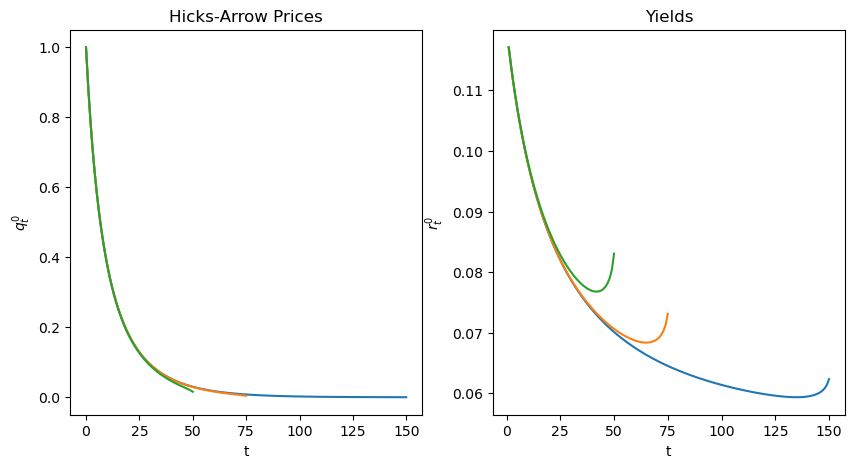

In [11]:
T_arr = [150, 75, 50]
plot_yield_curves(pp, 0, 0.3, k_ss/3, T_arr)

Now we plot when $t_0=20$

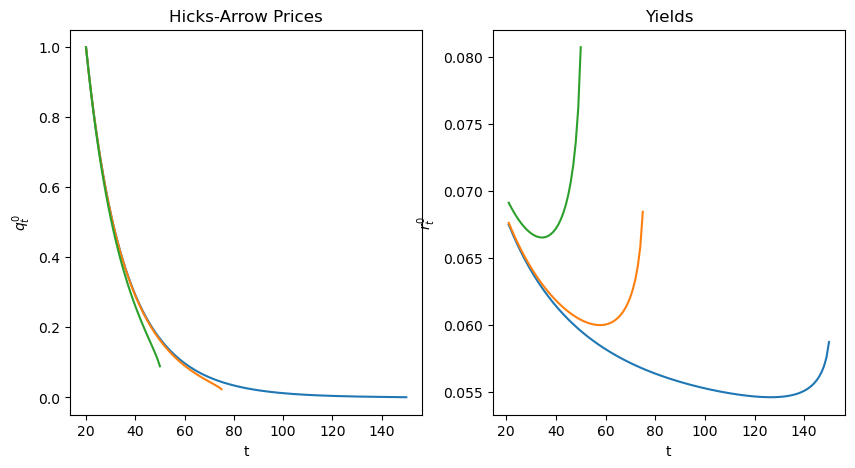

In [12]:
plot_yield_curves(pp, 20, 0.3, k_ss/3, T_arr)